This data set is composed of 26 Columns each having 205 rows. 
The issue is that the number of columns is too big compare to the number of rows. 
Thus to solve this issue and be sure to have an effective model we will need to reduce the number of columns using feature selection and dimensionality reduction method. 

# Data Preparation 

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sarahbismuth/dataM4/master/M4_Data.csv", header=None, names=['symboling', 
                                                      'nomalized_losses', 
                                                      'make', 
                                                      'fuel_type', 
                                                      'aspiration', 
                                                      'numofdoors', 
                                                      'body_style', 
                                                      'drive_wheels', 
                                                      'engine_location', 
                                                      'wheel_base', 
                                                      'length', 
                                                      'width',
                                                      'height', 
                                                      'curb_weight', 
                                                      'engine_type',
                                                      'num-of-cylinders',
                                                      'engine_size',
                                                      'fuel_system',
                                                      'bore',
                                                      'stroke',
                                                      'compression_ratio',
                                                      'horsepower',
                                                      'peak_rpm',
                                                      'city_mpg',
                                                      'highway_mpg',
                                                      'price'])

In [64]:
df

,symboling,nomalized_losses,make,fuel_type,aspiration,numofdoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,13207,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,13207,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,13207,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,13207,audi,gas,std,2,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,4,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,13207,audi,gas,std,4,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,4,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,13207,audi,gas,turbo,2,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,13207


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
nomalized_losses     205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
numofdoors           205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num-of-cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

1. symboling: -3, -2, -1, 0, 1, 2, 3. 
2. normalized-losses: continuous from 65 to 256. 
3. make: 
alfa-romero, audi, bmw, chevrolet, dodge, honda, 
isuzu, jaguar, mazda, mercedes-benz, mercury, 
mitsubishi, nissan, peugot, plymouth, porsche, 
renault, saab, subaru, toyota, volkswagen, volvo 

4. fuel-type: diesel, gas. 
5. aspiration: std, turbo. 
6. num-of-doors: four, two. 
7. body-style: hardtop, wagon, sedan, hatchback, convertible. 
8. drive-wheels: 4wd, fwd, rwd. 
9. engine-location: front, rear. 
10. wheel-base: continuous from 86.6 120.9. 
11. length: continuous from 141.1 to 208.1. 
12. width: continuous from 60.3 to 72.3. 
13. height: continuous from 47.8 to 59.8. 
14. curb-weight: continuous from 1488 to 4066. 
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. 
16. num-of-cylinders: eight, five, four, six, three, twelve, two. 
17. engine-size: continuous from 61 to 326. 
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. 
19. bore: continuous from 2.54 to 3.94. 
20. stroke: continuous from 2.07 to 4.17. 
21. compression-ratio: continuous from 7 to 23. 
22. horsepower: continuous from 48 to 288. 
23. peak-rpm: continuous from 4150 to 6600. 
24. city-mpg: continuous from 13 to 49. 
25. highway-mpg: continuous from 16 to 54. 
26. price: continuous from 5118 to 45400.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
nomalized_losses     205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
numofdoors           205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num-of-cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

In [6]:
#check if there is null values
df.isnull().sum()

symboling            0
nomalized_losses     0
make                 0
fuel_type            0
aspiration           0
numofdoors           0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num-of-cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

Even though there is no null data in this dataset, we can see that some variables have '?' values which represent unknown values. So in order to be able to work properly with this dataset we need to replace these unknown values.

In [42]:
#Find which row of the price column have ? values 
#Change the type of the price column from object to integer 
#Calculate the price mean (I choose this option since it seems the most appropriate(the number of rows is small), the easiest and a good fit regarding the number of missing values and this variable) 
price = df['price'].loc[df['price'] != '?']
pmean = price.astype(str).astype(int).mean()
#Replace '?' by the mean 
df['price'] = df['price'].replace('?',pmean).astype(int)
df['price'].head()

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [43]:
#Find which row of the nomalized_losses column have ? values 
#Change the type of the nomalized_lossescolumn from object to integer 
#Calculate the nomalized_losses mean (I choose this option since it seems the most appropriate, the easiest and a good fit regarding the number of missing values and this variable) 
nomalized_losses = df['nomalized_losses'].loc[df['nomalized_losses'] != '?']
normmean = price.astype(str).astype(int).mean()
#Replace '?' by the mean
df['nomalized_losses'] = df['nomalized_losses'].replace('?',pmean).astype(int)
df['nomalized_losses'].head()

0    13207
1    13207
2    13207
3      164
4      164
Name: nomalized_losses, dtype: int64

In [45]:
#Find which row of the horsepowercolumn have ? values 
#Change the type of the horsepower from object to integer 
#Calculate the horsepower mean (I choose this option since it seems the most appropriate, the easiest and a good fit regarding the number of missing values and this variable) 
horsepower = df['horsepower'].loc[df['horsepower'] != '?']
horsemean = price.astype(str).astype(int).mean()
##Replace '?' by the mean
df['horsepower'] = df['horsepower'].replace('?',horsemean).astype(int)
df['horsepower'].head()

0    111
1    111
2    154
3    102
4    115
Name: horsepower, dtype: int64

In [46]:
#check the number of non-numeric values for the door column 
print(df['numofdoors'].loc[df['numofdoors'] == '?'])



Series([], Name: numofdoors, dtype: object)


In [47]:
#since the number of numeric is very small (only 2) i have decided to remove these rows from the dataset 
#the index 27 and 63 are the index number where num-of-doors column have non numeric values 

df.drop(df.index[[27,63]], axis=0, inplace=True)

In [48]:
df['numofdoors'] = df.numofdoors.str.replace('four', '4')
df['numofdoors'] = df.numofdoors.str.replace('two', '2')

In [49]:
#Find which row of the peak_rpm have ? values 
#Change the type of the peak_rpmfrom object to integer 
#Calculate the peak_rpm mean 
peak_rpm= df['peak_rpm'].loc[df['peak_rpm'] != '?']
peakmean = price.astype(str).astype(int).mean()
#Replace '?' by the mean
df['peak_rpm'] = df['peak_rpm'].replace('?',peakmean).astype(int)
df['peak_rpm'].head()

0    5000
1    5000
2    5000
3    5500
4    5500
Name: peak_rpm, dtype: int64

In [50]:
#Find the '?' of the stoke column 
df['stroke'].loc[df['stroke'] == '?']

Series([], Name: stroke, dtype: float64)

In [51]:
#Change the type of the variable into numeric, and replace '?' values by null values 
df['stroke'] = pd.to_numeric(df['stroke'],errors='coerce')

In [52]:
#Replace the null values by the mean 
import numpy as np 
df['stroke'].replace(np.NaN,df['stroke'].mean(),inplace=True)

In [53]:
#Find the '?' of the bore column 
df['bore'].loc[df['bore'] == '?']

Series([], Name: bore, dtype: float64)

In [54]:
#Change the type of the variable into numeric, and replace '?' values by null values
df['bore'] = pd.to_numeric(df['bore'],errors='coerce')

In [55]:
#Replace the null values by the mean
import numpy as np 
df['bore'].replace(np.NaN,df['bore'].mean(),inplace=True)

In [20]:
df.head()

,symboling,nomalized_losses,make,fuel_type,aspiration,numofdoors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,13207,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,13207,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,13207,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
nomalized_losses     203 non-null int64
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
numofdoors           203 non-null object
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null int64
engine_type          203 non-null object
num-of-cylinders     203 non-null object
engine_size          203 non-null int64
fuel_system          203 non-null object
bore                 203 non-null float64
stroke               203 non-null float64
compression_ratio    203 non-null float64
horsepower           203 non-nu

# EDA

In [22]:
import matplotlib. pyplot as plt
import seaborn as sns

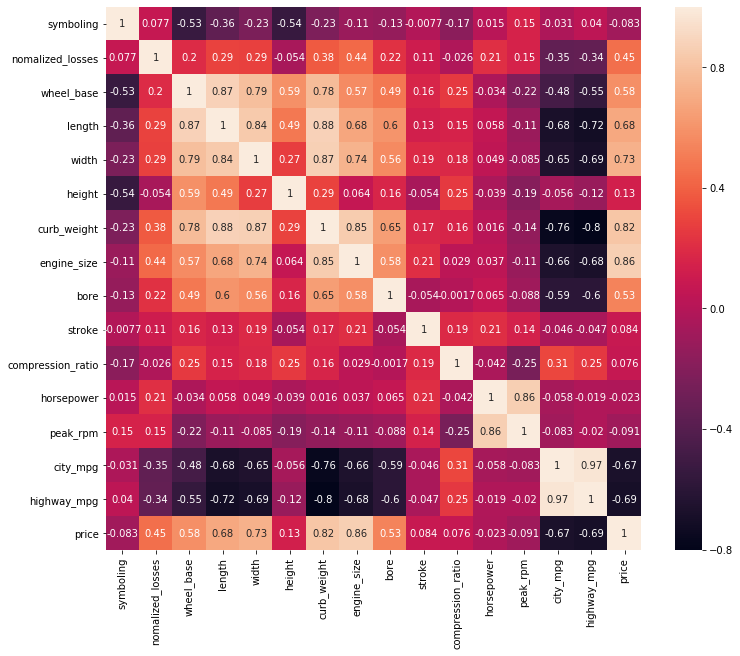

In [23]:
#correlation matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True)

This graph allows us to have a general idea  of how the different variables are correlated or not.
For instance city-mpg which will be our response variable later for the regression is highly and positively correlated with highway-mpg while it has a very weak and negative correlation with stroke.
All this information can give us a first shot of which variables could be good predictors for another one.

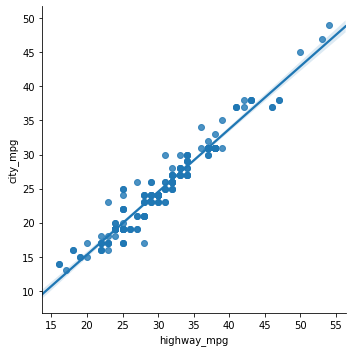

In [24]:
#i have decided to show on a scatter plot the variable that has the highest positive correlation with the response variable 
sns.lmplot('highway_mpg',"city_mpg", df);

This graph confirms the number that we can find in the correlation heatmap. The 2 variables are highly positively correlated with very few outliers.

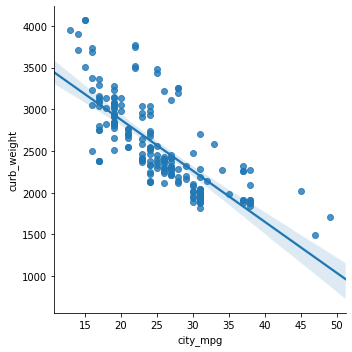

In [56]:
#Scatter plot of city-mpg and curb_weight
sns.lmplot('city_mpg',"curb_weight", df);

This graph shows another example of a hight correlation with the response variables.However, this time the variables are negatively correlated and we can see a largest number of outliers 

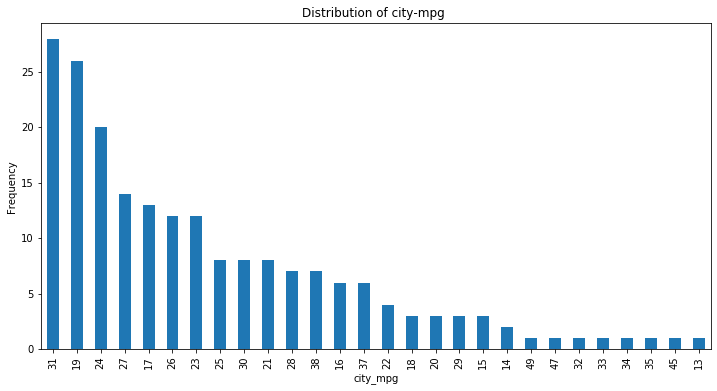

In [57]:
#bar plot city mpg 
dfData = df['city_mpg'].value_counts().plot(kind='bar',
                                    figsize=(12,6),
                                    title="Distribution of city-mpg ")
dfData.set_xlabel("city_mpg")
dfData.set_ylabel("Frequency")
plt.show()

We can see that a majority of the car have a city mpg of 31

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2aaa04a8>,
      dtype=object)

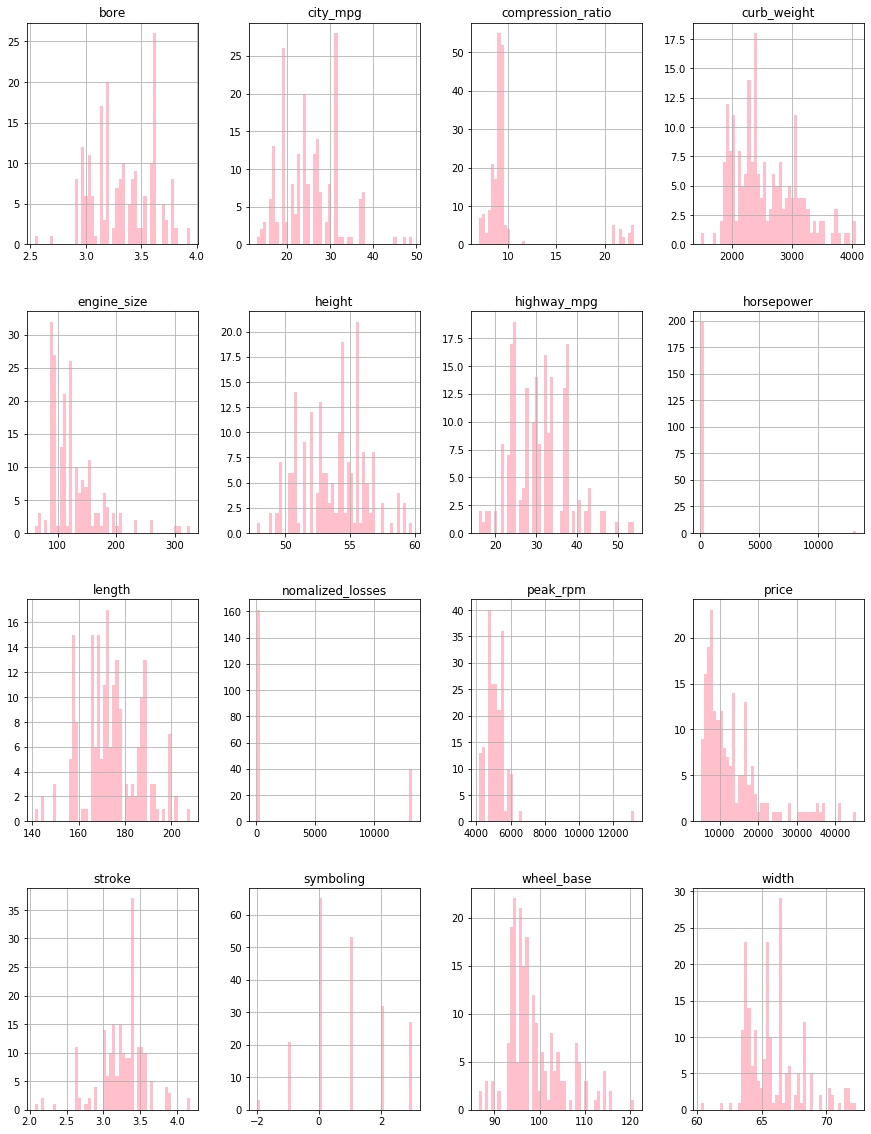

In [58]:
#histograms of the numeric variables of the DataFrame 
df.hist(figsize=(15,20),bins=50,color='pink')

These histograms give us an idea of how each variable is distributed. 
For instance we can see that price is left skewed, with a majority of cars that have a price less than 10 000.
We can also see that none of the variables are normaly distribruted and that except for symboling they do not have negative values.

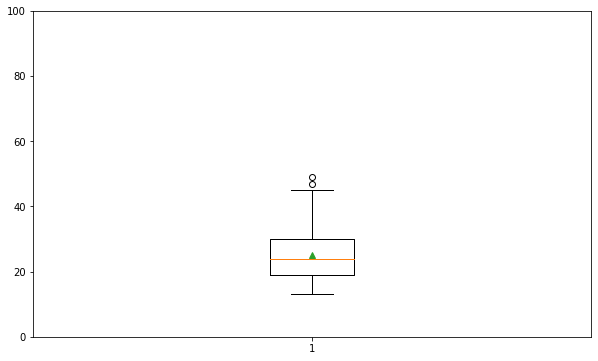

In [28]:
#box plot city-mpg
cc=df['city_mpg']
fig = plt.figure(1, figsize=(10, 6))
ax = fig.add_subplot(111)    
bp = ax.boxplot(cc, showmeans=True)
plt.ylim(0, 100)
plt.show()

We can see that this variables does not have a lot of ouliers 

# feature selection and dimensionality reduction

In [29]:
#Separate city_mpg from dataset (X, y) train and test
df_y = df.city_mpg
df_x = df.drop('city_mpg', axis=1)

In [30]:
# Get dummy variable for categorical columns (will increase number of columns)
df_dum = pd.get_dummies(df_x)
df_dum.head()

,symboling,nomalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel_system_1bbl,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,3,13207,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,13207,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,13207,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


In [31]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


from sklearn.linear_model import LinearRegression


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_dum, df_y, test_size=0.3, random_state=10)


# Normalize training data
scaler = StandardScaler().fit(X_train)

Xn_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

# Normalize testing data by using mean and SD of training set
Xn_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

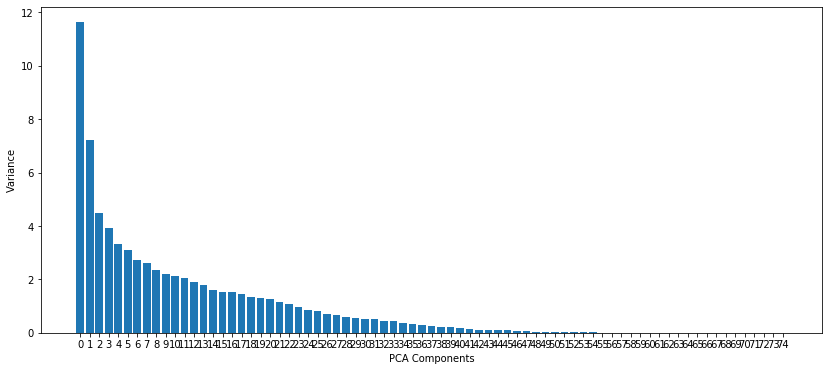

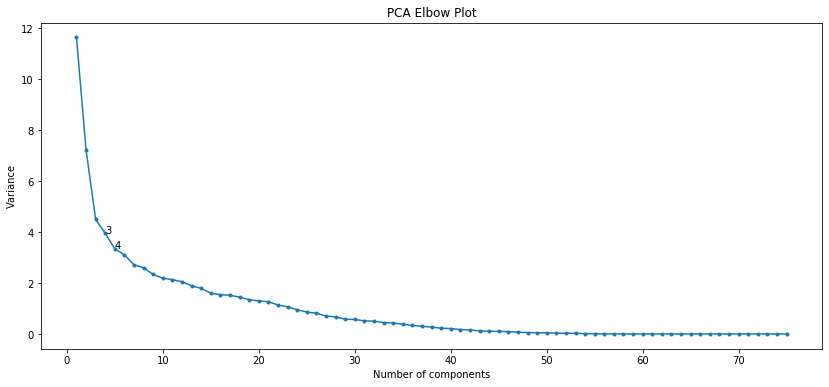

,0
0,-4.409104
1,-2.726766
2,-0.556694
3,-0.604430
4,-0.235178
5,-0.389106
6,-0.118714


In [32]:
import numpy as np
import sklearn.decomposition
pca = sklearn.decomposition.PCA()
pca.fit(Xn_train)

# Plot component variance to see the minimum amount of features needed for a good prediction
features = range(pca.n_components_)
plt.figure(figsize=(14,6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA Components')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

plt.figure(figsize=(14,6))
plt.plot(np.arange(1,(pca.n_components_+1)), pca.explained_variance_, marker='.')
plt.xlabel('Number of components')
plt.ylabel('Variance')
plt.title('PCA Elbow Plot')
plt.text(4,pca.explained_variance_[3], '3')
plt.text(5,pca.explained_variance_[4], '4')
plt.show()

diff = pd.DataFrame([y - x for x,y in zip(pca.explained_variance_,pca.explained_variance_[1:])])
diff.head(7)

From this we can see that 4-5 is a good number of features to use 

highway_mpg          0.081131
price                0.059732
horsepower           0.053331
curb_weight          0.051407
width                0.039445
compression_ratio    0.036988
height               0.036637
peak_rpm             0.034657
engine_size          0.034617
bore                 0.033907
dtype: float64


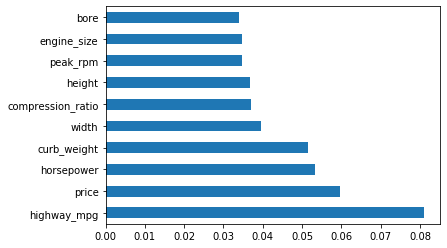

In [33]:
# Find best features using correlation method

# Tree based
X = Xn_train # Independent columns
y = y_train   # Target column

# Instantiate model
model = ExtraTreesClassifier(random_state=10)
model.fit(X,y)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feat_importances.sort_values(ascending=False).head(10))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/sarahbismuth/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


highway_mpg         2439.454601
horsepower           317.055526
curb_weight          190.646837
price                121.727271
length               112.368668
engine_size          111.575410
bore                 101.465138
width                 96.185816
fuel_system_mpfi      92.845537
drive_wheels_fwd      76.149596
dtype: float64


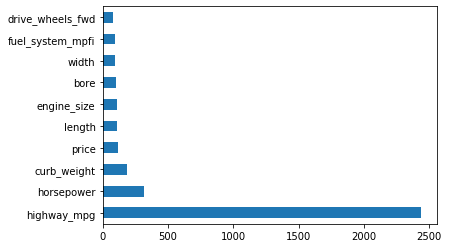

In [34]:
# Find best features using non-correlated method

# Univariate 
X = Xn_train  # Independent columns
y = y_train    # Target column

# Apply SelectKBest class to extract top 25 best features
# f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)

featureScores = pd.Series(fit.scores_, index=X.columns)

print(featureScores.nlargest(10))  # Print 10 best features
featureScores.sort_values(ascending=False).head(10).plot(kind='barh')
plt.show()

In [35]:
# Select the top 5 features and view feature importance using OLS

# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('city_mpg ~ highway_mpg + price + horsepower + curb_weight + engine_size', df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:               city_mpg   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     684.1
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          2.19e-122
Time:                        15:33:39   Log-Likelihood:                -373.05
No. Observations:                 203   AIC:                             758.1
Df Residuals:                     197   BIC:                             778.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.0498      1.648     -3.670      

The summary shows that highway_mpg has the most affect on predicting city_mpg.

We will be using 2 methods for evaluating our model.

1. RMSE (Root Mean Squared Error): Most popular metric, similar to MSE, however, the result is square rooted to make it more interpretable as it’s in base units. It is recommended that RMSE be used as the primary metric to interpret your model.

2. MAE (Mean Absolute Error): The easiest to understand. Represents average error.


RMSE: 5212928054727.404
MAE: 1520706808768.8662


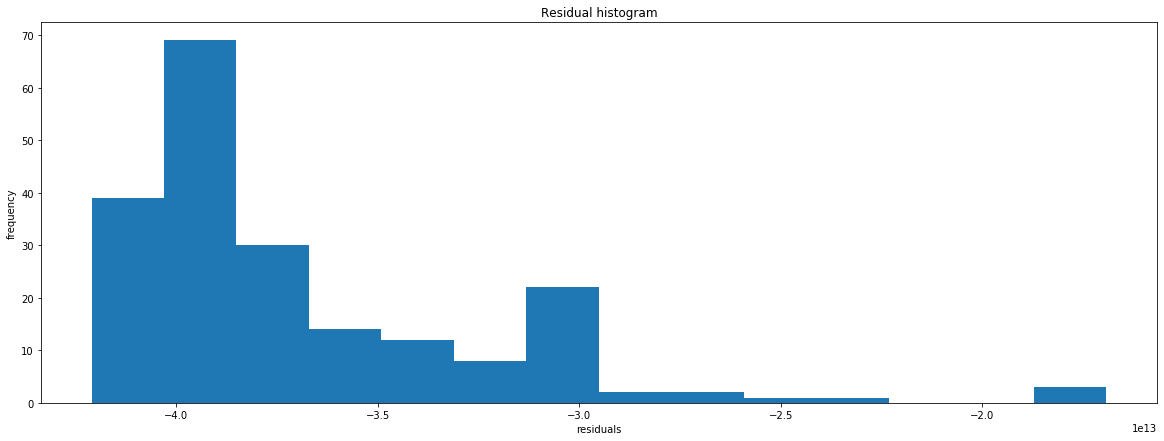

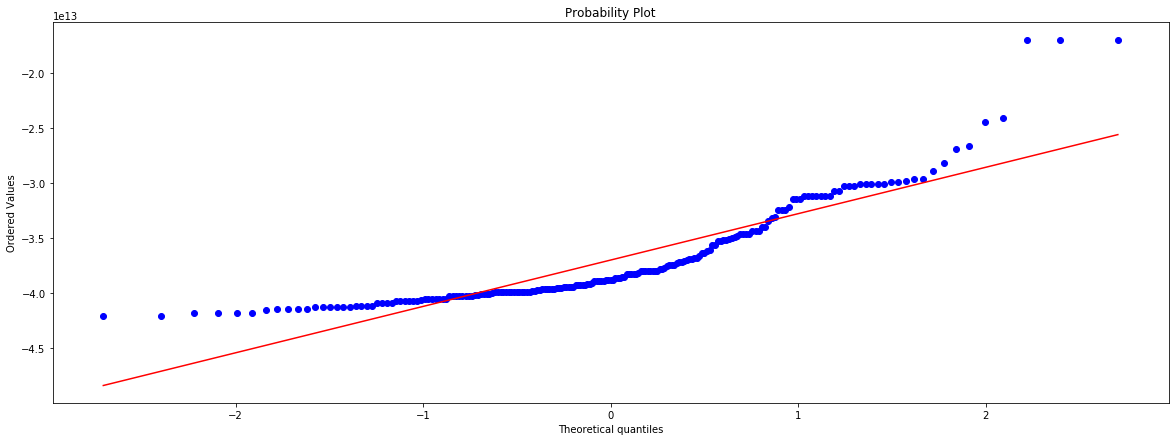

In [36]:
# Test using RMSE for all features

from sklearn import metrics
from scipy.stats import probplot, shapiro

reg = LinearRegression()

clf = reg.fit(Xn_train, y_train)
y_pred = clf.predict(Xn_test)

# RMSE
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

# MAE
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))


# Predict city_mpg
predicted = reg.predict(df_dum)

# Find difference for each price and predicted price
resid = df_y-predicted


# Plot residuals
plt.figure(figsize=(20,7))
plt.hist(resid, bins=int(np.sqrt(len(resid))))
plt.title("Residual histogram")
plt.xlabel("residuals")
plt.ylabel("frequency")

plt.show()

# Plot quantile plot to see if residuals are normally distributed
plt.figure(figsize=(20,7))
qq = probplot(resid, plot=plt)

In [59]:
# Cross validate using 5 (i choose 5 because it is a common  k value )
cv = cross_validate(reg, df_dum, df_y, cv=5)
np.mean(cv['test_score'])

-6.439812890973963

RMSE: 84.79827561807107
MAE: 16.409830304158227


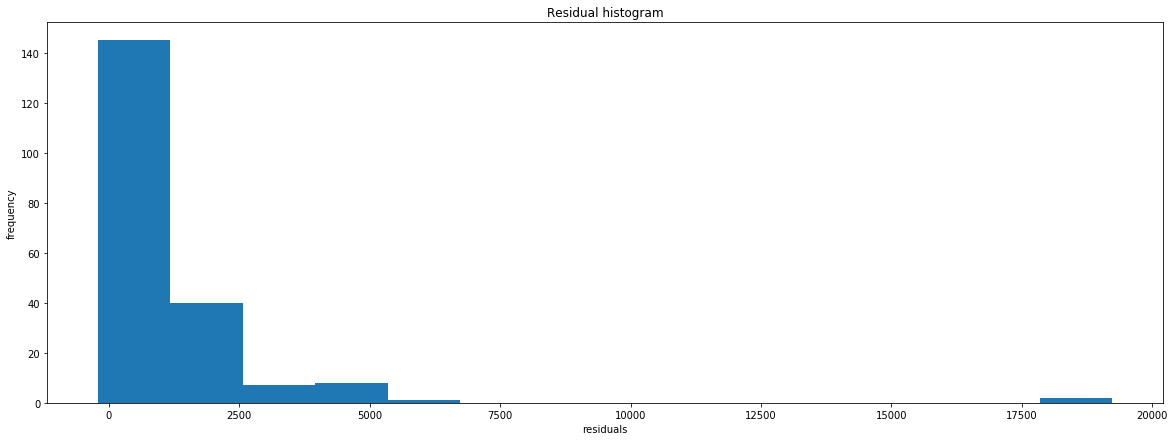

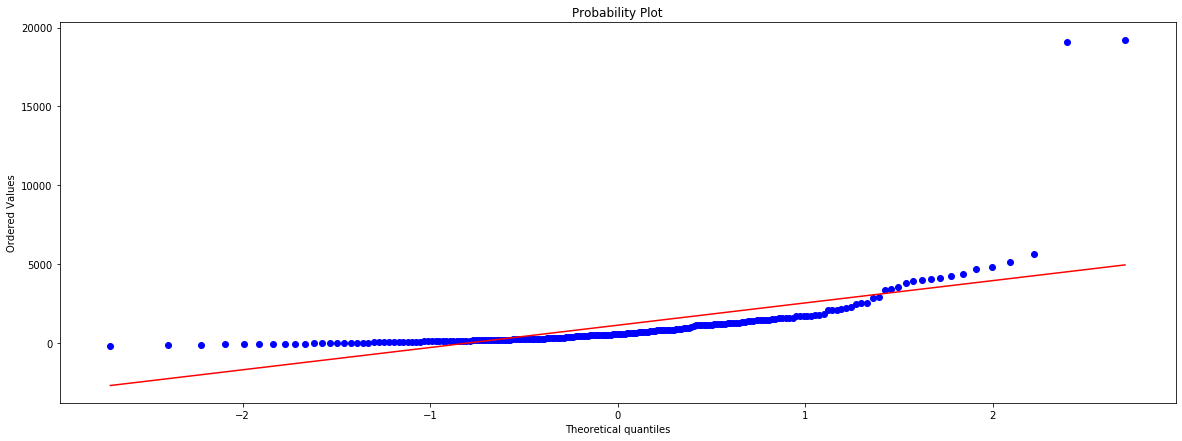

In [38]:
# Test using RMSE for top 5

features = ['highway_mpg', 'price', 'horsepower', 'curb_weight', 'engine_size']

clf = reg.fit(Xn_train[features], y_train)
y_pred = clf.predict(Xn_test[features])


# RMSE
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

# MAE
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))


# Predict city_mpg
predicted = reg.predict(df_dum[features])

# Find difference for each price and predicted price
resid = df_y-predicted


# Plot residuals
plt.figure(figsize=(20,7))
plt.hist(resid, bins=int(np.sqrt(len(resid))))
plt.title("Residual histogram")
plt.xlabel("residuals")
plt.ylabel("frequency")

plt.show()

# Plot quantile plot to see if residuals are normally distributed
plt.figure(figsize=(20,7))
qq = probplot(resid, plot=plt)

In [63]:
# Cross validate using 5
cv = cross_validate(reg, df_dum[features], df_y, cv=5)
np.mean(cv['test_score'])

-27.19798929810063

RMSE: 1.517405229446568
MAE: 1.1500659439907235


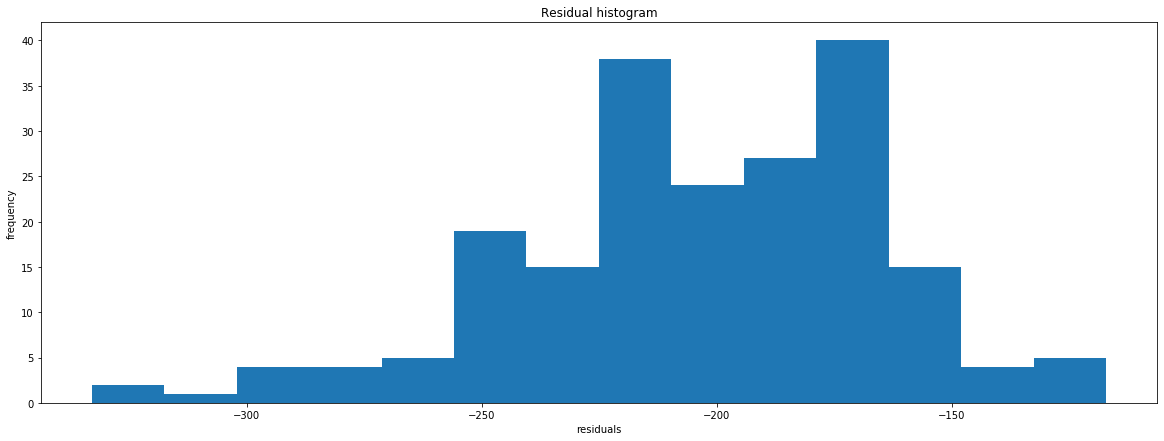

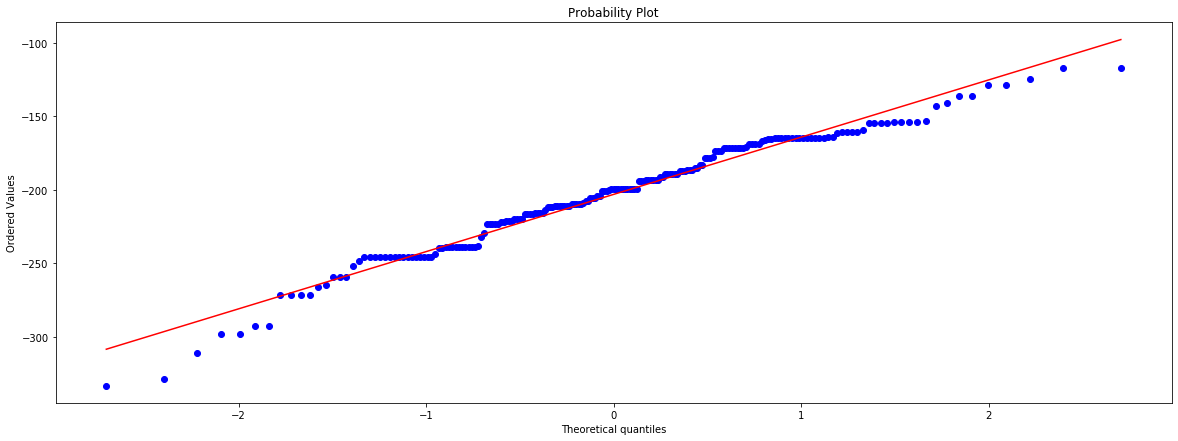

In [40]:
# Test using RMSE for one feature

clf = reg.fit(Xn_train[['highway_mpg']], y_train)
y_pred = clf.predict(Xn_test[['highway_mpg']])


# RMSE
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

# MAE
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))


# Predict city_mpg
predicted = reg.predict(df_dum[['highway_mpg']])

# Find difference for each price and predicted price
resid = df_y-predicted


# Plot residuals
plt.figure(figsize=(20,7))
plt.hist(resid, bins=int(np.sqrt(len(resid))))
plt.title("Residual histogram")
plt.xlabel("residuals")
plt.ylabel("frequency")

plt.show()

# Plot quantile plot to see if residuals are normally distributed
plt.figure(figsize=(20,7))
qq = probplot(resid, plot=plt)

In [62]:
# Cross validate using 5
cv = cross_validate(reg, df_dum[['highway_mpg']], df_y, cv=5)
np.mean(cv['test_score'])

0.9289437661488659

From this we can see that the smaller the number of feature the better the model and the results are.

# CONCLUSION 

We can conclude that when we don't have a lot of information but a relatively large number of columnS keeping it like that is not the option to keep. 
We need to reduce the dimensionality and use the feature selection to be sure to have an effective model.
In the case of this dataset we can see that if we use city-mpg as a response variable using only one feature will lead to have the best predictive model. 